In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np


import seaborn as sns

import plotly.graph_objects as go

import functools

I created the **python_visualizations** environment with Anaconda for this exercise. 

# Import The Data

In [2]:
# Read in S&P 500 and Campbell Soup Company Data

cpb = pd.read_csv('supporting_files/CPB.csv')
sandp500 = pd.read_csv('supporting_files/^GSPC.csv')

Year-To_Date (YTD) Historical Data Sources:

Campbell Soup Company (CPB): https://finance.yahoo.com/quote/CPB/history?p=CPB&.tsrc=fin-srch

S&P 500 (^GSPC): https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

In [3]:
#The CPB data frame header

cpb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-21,40.430000,40.549999,39.340000,39.520000,38.147472,2443500
1,2018-11-23,39.619999,40.689999,39.529999,40.529999,39.122398,1369500
2,2018-11-26,40.529999,40.529999,38.790001,39.020000,37.664841,5348400
3,2018-11-27,39.049999,39.529999,38.889999,39.509998,38.137821,2306900
4,2018-11-28,39.500000,39.700001,39.090000,39.500000,38.128170,2284900


In [4]:
#The S&P 500 data frame header

sandp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-21,2657.739990,2670.729980,2649.820068,2649.929932,2649.929932,3233550000
1,2018-11-23,2633.360107,2647.550049,2631.090088,2632.560059,2632.560059,1651650000
2,2018-11-26,2649.969971,2674.350098,2649.969971,2673.449951,2673.449951,3443950000
3,2018-11-27,2663.750000,2682.530029,2655.889893,2682.169922,2682.169922,3485220000
4,2018-11-28,2691.449951,2744.000000,2684.379883,2743.790039,2743.790039,3951670000


In [5]:
# # Convert data frames to string type

# cpb.Date = cpb.Date.astype(str)
# sandp500.Date = sandp500.Date.astype(str)

# Matplotlib

In [6]:
# https://stackoverflow.com/questions/42373104/since-matplotlib-finance-has-been-deprecated-how-can-i-use-the-new-mpl-finance/54368690#54368690

#Run the following line once
#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [7]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc

# Import with volume
from mpl_finance import volume_overlay3

import urllib
import datetime as dt

from matplotlib.pyplot import figure
%matplotlib inline

In [8]:
cpb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-21,40.430000,40.549999,39.340000,39.520000,38.147472,2443500
1,2018-11-23,39.619999,40.689999,39.529999,40.529999,39.122398,1369500
2,2018-11-26,40.529999,40.529999,38.790001,39.020000,37.664841,5348400
3,2018-11-27,39.049999,39.529999,38.889999,39.509998,38.137821,2306900
4,2018-11-28,39.500000,39.700001,39.090000,39.500000,38.128170,2284900


In [9]:
type(cpb.Date[0])

str

In [10]:
# Convert Date column to Matplotlib's float format

# https://matplotlib.org/3.1.1/api/dates_api.html#matplotlib.dates.date2num

import matplotlib.dates as dates
cpb.Date = dates.datestr2num(cpb.Date)
sandp500.Date = dates.datestr2num(sandp500.Date)

In [11]:
type(cpb.Date[0])

numpy.float64

In [12]:
# https://stackoverflow.com/a/9762084

cpb_subset = cpb[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
cpb_list = [list(x) for x in cpb_subset.values]
# cpb_list = [i for sub in cpb_list for i in sub]

sandp500_subset = sandp500[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
sandp500_list = [list(x) for x in sandp500_subset.values]
# sandp500_list = [i for sub in sandp500_list for i in sub]

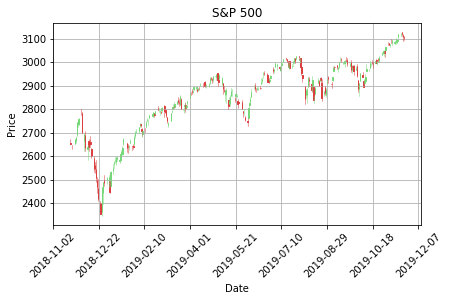

In [18]:
# https://pythonprogramming.net/candlestick-ohlc-graph-matplotlib-tutorial/

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

candlestick_ohlc(ax1, sandp500_list, width=0.4, colorup='#77d879', colordown='#db3f3f')

for label in ax1.xaxis.get_ticklabels():
     label.set_rotation(45)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500')
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

In [15]:
volume_overlay3(ax1, sandp500_list, colorup='k', colordown='r', width=4, alpha=1.0)
plt.show()

In [ ]:
# create the second axis for the volume bar-plot
ax2 = ax.twinx()


# set the position of ax2 so that it is short (y2=0.32) but otherwise the same size as ax
ax2.set_position(matplotlib.transforms.Bbox([[0.125,0.1],[0.9,0.32]]))

# get data from candlesticks for a bar plot
dates = [x[0] for x in candlesticks]
dates = np.asarray(dates)
volume = [x[5] for x in candlesticks]
volume = np.asarray(volume)

# make bar plots and color differently depending on up/down for the day
pos = r['open']-r['close']<0
neg = r['open']-r['close']>0
ax2.bar(dates[pos],volume[pos],color='green',width=1,align='center')
ax2.bar(dates[neg],volume[neg],color='red',width=1,align='center')

#scale the x-axis tight
ax2.set_xlim(min(dates),max(dates))
# the y-ticks for the bar were too dense, keep only every third one
yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::3])

ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Volume', size=20)

# format the x-ticks with a human-readable date. 
xt = ax.get_xticks()
new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
ax.set_xticklabels(new_xticks,rotation=45, horizontalalignment='right')

plt.ion()
plt.show()
